In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## Functions Implementation

In [2]:
SAMPLE_RATE = 1000  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

In [3]:
def generate_z_filter(zeros,poles):
    # zero pole filter
    # w is frequencies normalized to the range [0, pi) 
    # h is frequency response
    w, h = signal.freqz_zpk(zeros, poles,1, fs=1000 )
    # calculating magnitude and phase response
    magnitude = 20 * np.log10(abs(h))
#     magnitude = abs(h)

    angles = np.unwrap(np.angle(h))
    return w,magnitude,angles

In [4]:
def plot_z_filter(zeros,poles):
    freq ,magnitude ,angles =   generate_z_filter(zeros,poles)
    # magnitude and phase response plot
    fig, (ax1, ax2) = plt.subplots(2, 1 , figsize=(8, 6))
    fig.suptitle('Digital filter frequency response')

    # ax1.set_title('Digital filter frequency response')
    ax1.plot(freq, magnitude, 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency [Hz]')
    ax1.grid(True)

    ax2.plot(freq, angles, 'g')
    ax2.set_ylabel('Angle [radians]', color='g')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.grid(True)
    plt.show()

In [5]:
def filter_signal(zeros,poles,sig):
    # filter coefficients
    # polynomial transfer function representation from zeros and poles
    b , a = signal.zpk2tf(zeros,poles,1)
    # apply filter by difference equation on signal
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, sig, zi=zi*sig[0])
#     y = signal.lfilter(b, a, sig)
    return z

In [6]:
def generate_all_pass_filter(a):
    p=a
    z =[1/np.conj(x) for x in a]
    w, h = signal.freqz_zpk(z, p, 1 )
    angles = np.unwrap(np.angle(h))
    return w  , angles

In [7]:
def getAllPassFrequencyResponse(z , p , a ):
    zeros = z[:]
    poles = p[:]
    for x in a :
        poles.append(x)
        zeros.append(1/np.conj(x))
    print(zeros)
    print(poles)
        
    freq ,magnitude ,angles =   generate_z_filter(zeros,poles)
    return freq,magnitude,angles

In [8]:
def addAllPassZerosPoles(z , p , a ):
    zeros = z[:]
    poles = p[:]
    for x in a :
        poles.append(x)
        zeros.append(1/np.conj(x))
    return zeros,poles

## Using Functions

In [9]:
# Zeros and poles to make filter
z = [1]
p = [0]  
k=1

In [10]:
freq ,magnitude ,angles =  generate_z_filter(z,p)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3408547814.py:7: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3408547814.py:7: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


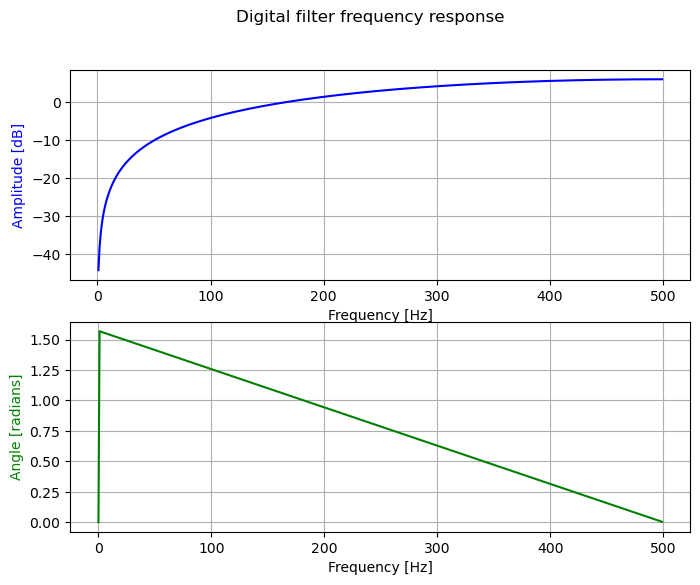

In [11]:
plot_z_filter(z,p)

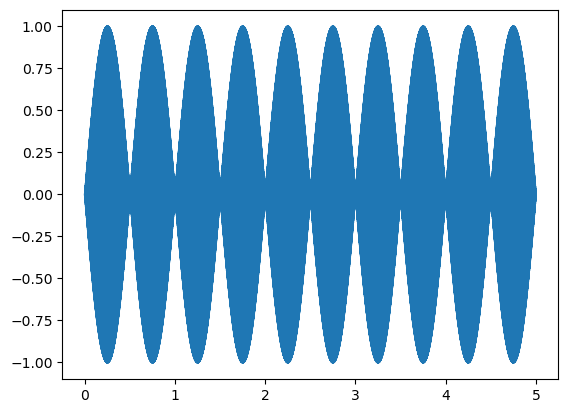

In [12]:
# Generate a 2 hertz sine wave that lasts for 5 seconds
t, sig = generate_sine_wave(499, SAMPLE_RATE, DURATION)
plt.plot(t, sig)
plt.show()

In [13]:
filtered_signal = filter_signal(z,p,sig)

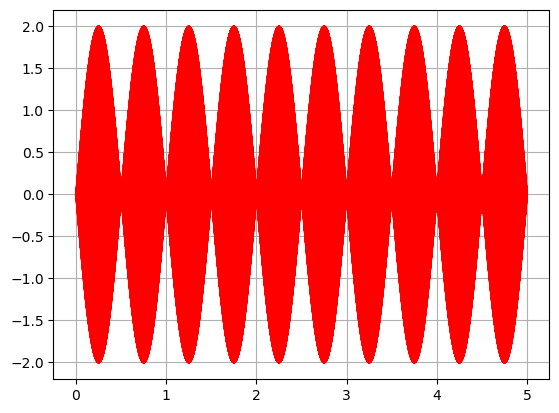

In [14]:
plt.figure
plt.plot(t, sig, 'b')
plt.plot( t, filtered_signal, 'r')
# plt.legend(('noisy signal', 'lfilter, once' , 'lfilter initial'), loc='best')
plt.grid(True)
plt.show()
# High pass filtered magnified gain at high frequencies

In [15]:
# def generate_all_pass_filter(a):
#     p=a
#     z =1/np.conj(a)
#     w, h = signal.freqz_zpk(z, p, k )
#     angles = np.unwrap(np.angle(h))
#     return w  , angles

In [16]:
a = [0.5 + 4j] 
w  , angle = generate_all_pass_filter(a)

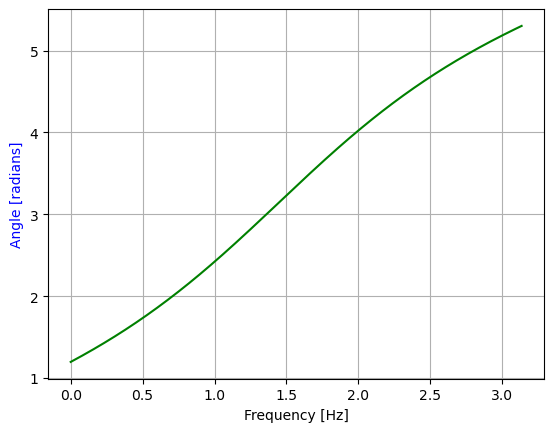

In [17]:
# all pass phase response plot
plt.plot(w, angle, 'g')
plt.ylabel('Angle [radians]', color='b')
plt.xlabel('Frequency [Hz]')
plt.grid(True)
plt.show()

[1, (0.03076923076923077+0.24615384615384617j)]
[0, (0.5+4j)]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3408547814.py:7: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


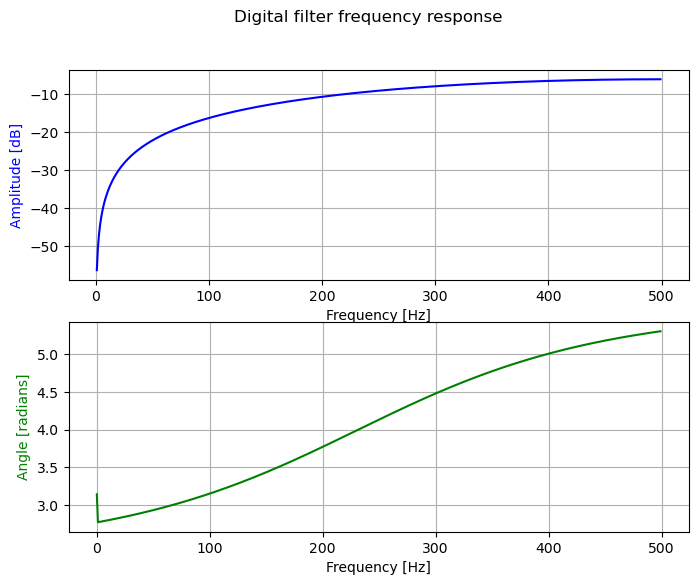

In [18]:
freq ,magnitude ,angles =   getAllPassFrequencyResponse(z, p , a)
# magnitude and phase response plot
fig, (ax1, ax2) = plt.subplots(2, 1 , figsize=(8, 6))
fig.suptitle('Digital filter frequency response')

# ax1.set_title('Digital filter frequency response')
ax1.plot(freq, magnitude, 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(True)

ax2.plot(freq, angles, 'g')
ax2.set_ylabel('Angle [radians]', color='g')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid(True)
plt.show()

## Filter with all pass

In [19]:
# Zeros and poles to make filter
z = [1]
p = [0]  
k=1

In [20]:
freq ,magnitude ,angles =  generate_z_filter(z,p)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3408547814.py:7: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


In [21]:
a = [0.5 ]
w  , angle = generate_all_pass_filter(a)

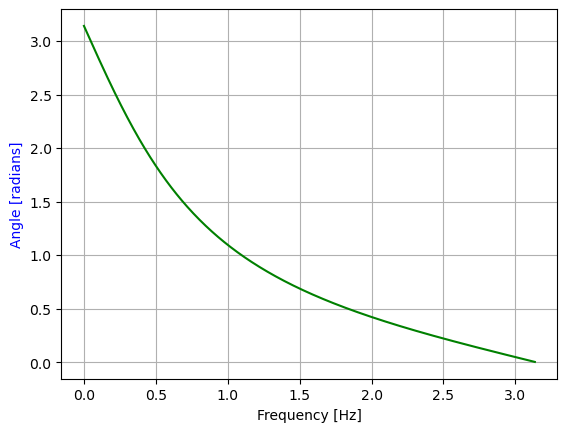

In [22]:
# all pass phase response plot

plt.plot(w, angle, 'g')
plt.ylabel('Angle [radians]', color='b')
plt.xlabel('Frequency [Hz]')
plt.grid(True)
plt.show()

In [23]:
z = [1]
p = [2+1j]  
a = [0.7 , 3]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3408547814.py:7: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


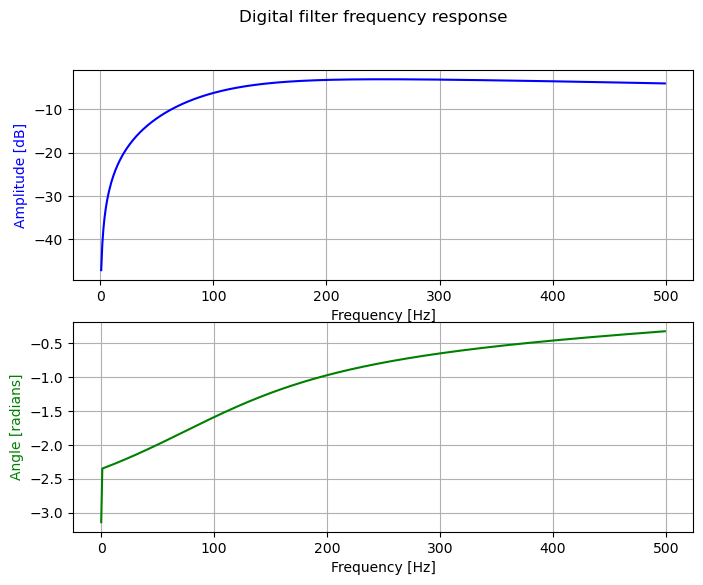

In [24]:
# filter alone
plot_z_filter(z,p)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26008\3408547814.py:7: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(abs(h))


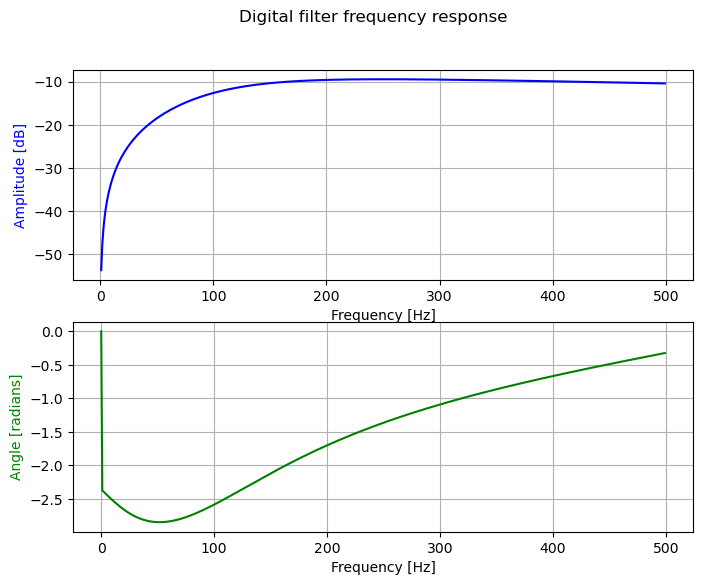

In [25]:
# Filter with all pass
zeros,poles = addAllPassZerosPoles(z , p , a )
plot_z_filter(zeros,poles)

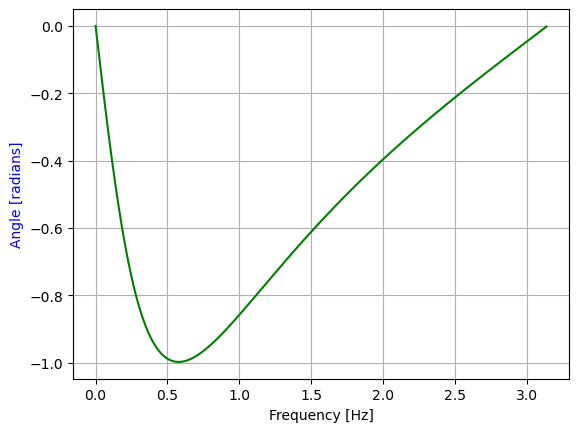

In [26]:
w  , angle = generate_all_pass_filter(a)
# all pass phase response plot
plt.plot(w, angle, 'g')
plt.ylabel('Angle [radians]', color='b')
plt.xlabel('Frequency [Hz]')
plt.grid(True)
plt.show()